# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_diab = pd.read_csv(r"diabetes.csv")
df_diab.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

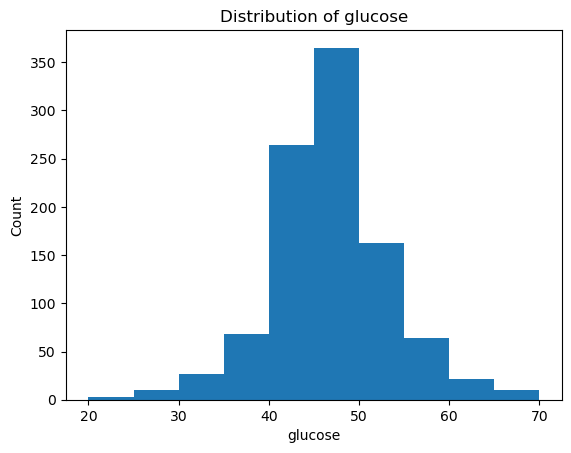

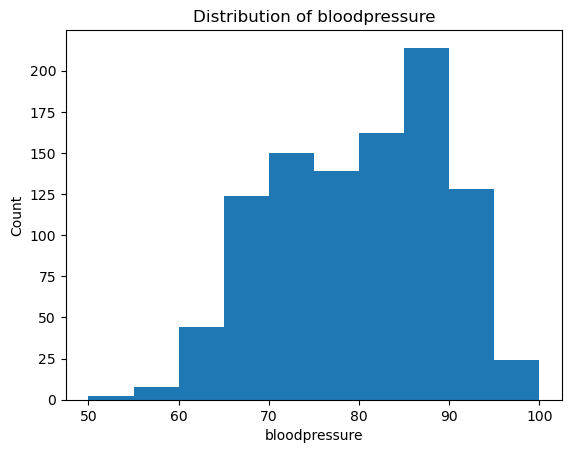

In [2]:
feature_columns = df_diab.columns.values.tolist()
feature_columns.pop(2)

for column in feature_columns:
    plt.figure()
    plt.hist(df_diab[column])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Distribution of {column}")
    plt.show()
    



 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting the dataset into features (X) and target (y)
X = df_diab[['glucose']]
y = df_diab['diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.6834170854271356


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [4]:
df_insur = pd.read_csv(r"insurance.csv")
df_insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Separating numerical and categorical columns
feature_columns = df_insur.columns.values.tolist()
feature_columns.pop()
numerical_col = []
categorical_col = []

for col in feature_columns:
    if df_insur[col].dtype in [int, float]:
        numerical_col.append(col)
    else:
        categorical_col.append(col)
        
categorical_col.remove('age')
numerical_col.append('age')

# Label encoding categorical columns
label_encoder = LabelEncoder()

for col in categorical_col:
    df_insur[col] = label_encoder.fit_transform(df_insur[col])
    
# Scaling numerical columns
scaler = StandardScaler()

df_insur[numerical_col] = scaler.fit_transform(df_insur[numerical_col])

# Scaling charges column separately
y = np.array(df_insur['charges']).reshape(-1,1)
y = scaler.fit_transform(y)

### 5. Split the data.

In [6]:
X = df_insur[feature_columns]
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Defining the parameter grid for RandomizedSearchCV
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

# Creating the SVR model
svr = SVR()

# Performing RandomizedSearchCV
random_search = RandomizedSearchCV(svr, param_distributions=parameters, cv=3)
random_search.fit(X_train, y_train)

# Getting the best parameters
best_params = random_search.best_params_

# Initialize the SVR model with the best parameters
best_svr = SVR(kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


MAE: 0.27222469198067206
MSE: 0.27131294934835837


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [8]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'loss': ['linear', 'square', 'exponential']
}

# Creating the AdaBoostRegressor model
ada_boost = AdaBoostRegressor()

# Performing GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_

# Initialize the AdaBoostRegressor model with the best parameters
best_ada_boost = AdaBoostRegressor(n_estimators=best_params['n_estimators'], loss=best_params['loss'])
best_ada_boost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_ada_boost.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.39433645320742133
MSE: 0.20961850019463618


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [9]:
!pip install xgboost 

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


# Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'],
                                max_depth=best_params_rf['max_depth'],
                                min_samples_split=best_params_rf['min_samples_split'])

best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)


# Gradient Boosting Regression
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_gb = GradientBoostingRegressor(n_estimators=best_params_gb['n_estimators'],
                                    learning_rate=best_params_gb['learning_rate'],
                                    max_depth=best_params_gb['max_depth'])
best_gb.fit(X_train, y_train)
y_pred_gb = best_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)


# XGBoost Regressor
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
xgb = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_xgb = XGBRegressor(n_estimators=best_params_xgb['n_estimators'],
                        learning_rate=best_params_xgb['learning_rate'],
                        max_depth=best_params_xgb['max_depth'])
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)


# Compare models
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
mae_scores = [mae_rf, mae_gb, mae_xgb]
mse_scores = [mse_rf, mse_gb, mse_xgb]

print("MAE Scores:")
for model, mae in zip(models, mae_scores):
    print(f"{model}: {mae}")

print("\nMSE Scores:")
for model, mse in zip(models, mse_scores):
    print(f"{model}: {mse}")

MAE Scores:
Random Forest: 0.20791652557583787
Gradient Boosting: 0.2033547422162961
XGBoost: 0.20594040042848658

MSE Scores:
Random Forest: 0.13257104153442553
Gradient Boosting: 0.1271515134891192
XGBoost: 0.12729248038012725


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [83]:
df_book = pd.read_csv(r"bookmyshow_ads.csv")
df_book.drop('index',axis=1,inplace=True)

In [90]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

### 2. Split the data.

In [85]:
feature_col = df_book.columns.values.tolist()
feature_col.pop()

X = df_book[feature_col]
y = df_book['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [88]:
# Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=3)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_dt = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'],
                                 min_samples_split=best_params_dt['min_samples_split'])
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                 max_depth=best_params_rf['max_depth'],
                                 min_samples_split=best_params_rf['min_samples_split'])
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}
ab = AdaBoostClassifier()
grid_search_ab = GridSearchCV(ab, param_grid=param_grid_ab, cv=3)
grid_search_ab.fit(X_train, y_train)
best_params_ab = grid_search_ab.best_params_
best_ab = AdaBoostClassifier(n_estimators=best_params_ab['n_estimators'],
                             learning_rate=best_params_ab['learning_rate'])
best_ab.fit(X_train, y_train)
y_pred_ab = best_ab.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_gb = GradientBoostingClassifier(n_estimators=best_params_gb['n_estimators'],
                                     learning_rate=best_params_gb['learning_rate'],
                                     max_depth=best_params_gb['max_depth'])
best_gb.fit(X_train, y_train)
y_pred_gb = best_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_xgb = XGBClassifier(n_estimators=best_params_xgb['n_estimators'],
                         learning_rate=best_params_xgb['learning_rate'],
                         max_depth=best_params_xgb['max_depth'])
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Compare models
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_dt, accuracy_rf, accuracy_ab, accuracy_gb, accuracy_xgb]

print("Model Accuracies:")
for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy}")



Model Accuracies:
Decision Tree: 0.9319826338639653
Random Forest: 0.9659913169319826
AdaBoost: 0.928726483357453
Gradient Boosting: 0.9681620839363242
XGBoost: 0.9692474674384949


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [46]:
df_segment = pd.read_csv(r"segmentation data.csv")
df_segment

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [47]:
# Among the given columns Customer ID and Settlement size will be of no use in customer classification
df_segment.drop(['ID','Settlement size'], axis=1, inplace=True)
df_segment

,Sex,Marital status,Age,Education,Income,Occupation
0,0,0,67,2,124670,1
1,1,1,22,1,150773,1
2,0,0,49,1,89210,0
3,0,0,45,1,171565,1
4,0,0,53,1,149031,1
...,...,...,...,...,...,...
1995,1,0,47,1,123525,0
1996,1,1,27,1,117744,1
1997,0,0,31,0,86400,0
1998,1,1,24,1,97968,0


In [48]:
df_segment.info()

# Through this it is visible that there is no column with any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             2000 non-null   int64
 1   Marital status  2000 non-null   int64
 2   Age             2000 non-null   int64
 3   Education       2000 non-null   int64
 4   Income          2000 non-null   int64
 5   Occupation      2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


In [49]:
# Standardising the columns

feature_col = df_segment.columns.values.tolist()
scaler = StandardScaler()
df_segment[feature_col] = scaler.fit_transform(df_segment[feature_col])
df_segment

,Sex,Marital status,Age,Education,Income,Occupation
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823
...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

C:\Users\shash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

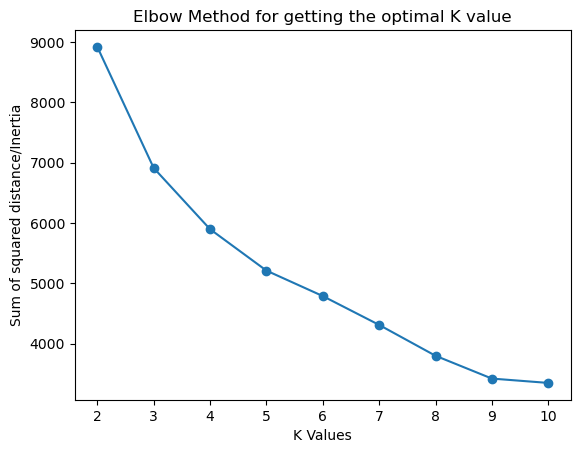

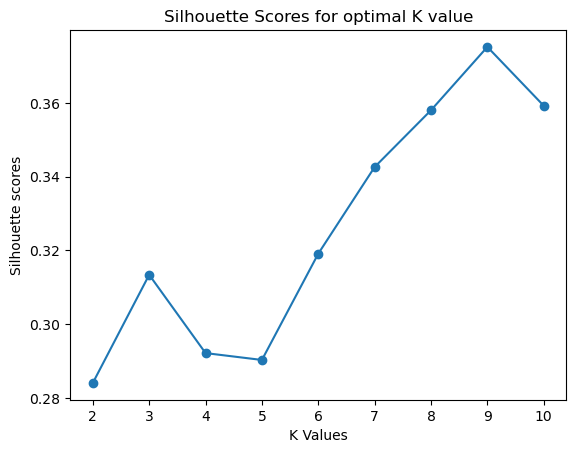

In [50]:
# Applying KMeans and silhouette scores

sum_sqr_dist = []
silhouette_value = []
K = range(2,11)
for k in K:
    
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(df_segment)
    
    # Storing mean squared distances in list
    sum_sqr_dist.append(kmeans.inertia_)
    
    # Calculating Silhouette scores
    cluster_labels = kmeans.labels_
    silhouette_value.append(silhouette_score(df_segment, cluster_labels))
    
# Plotting Kmeans    
plt.plot(K,sum_sqr_dist,marker='o')
plt.xlabel('K Values')
plt.ylabel('Sum of squared distance/Inertia')
plt.title('Elbow Method for getting the optimal K value')
plt.show()

# Plotting Silhouette score
plt.plot(K,silhouette_value, marker='o')
plt.xlabel('K Values')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Scores for optimal K value')
plt.show()
# On running the code we see K=3 gives the optimal value for KMeans and K=10 gives the optimal value for Silhouette Score


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [51]:
# Kmeans model
Kmeans_model = KMeans(n_clusters = 4, n_init='auto', random_state=42)
Kmeans_model.fit(df_segment)

inertia = Kmeans_model.inertia_
cluster_labels = Kmeans_model.labels_
silhouette_avg = silhouette_score(df_segment,cluster_labels)

print('Inertia is: ',inertia)
print('Silhouette score is:', silhouette_avg)

Inertia is:  5986.1018295289405
Silhouette score is: 0.28764600913911065


C:\Users\shash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [53]:
class KMeans_scratch:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly
        self.centroids = np.random.randn(self.k, n_features)

        # Iterate until convergence
        for i in range(self.max_iter):
            # Assign each sample to its closest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            # Update centroids as mean of samples assigned to them
            centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.k)])

            # Check for convergence
            if np.allclose(self.centroids, centroids):
                break

            self.centroids = centroids

        # Set labels_ attribute
        self.labels_ = labels


scratch_kmeans = KMeans_scratch(k=4)
scratch_kmeans.fit(np.array(df_segment))
scratch_labels = scratch_kmeans.labels_
silhouette_scratch = silhouette_score(np.array(df_segment), scratch_labels)

print("Labels of SKlearn Model: ", cluster_labels)
print("Silhouette score of SKlearn Model is: ", silhouette_avg)

print("Labels of our model: ", scratch_labels)
print("Silhouette score of our model is: ", silhouette_scratch)


Labels of SKlearn Model:  [3 2 1 ... 1 1 1]
Silhouette score of SKlearn Model is:  0.28764600913911065
Labels of our model:  [3 0 2 ... 2 0 2]
Silhouette score of our model is:  0.29263294289544034


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [55]:
# Define the list of probable values for epsilon and min_samples
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

max_silhouette_score = -1  # Initialize maximum silhouette score
best_eps = None  # Initialize best epsilon
best_min_samples = None  # Initialize best min_samples

# Nested loop to iterate over epsilon and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_model.fit(df_segment)
        
        # Calculate silhouette score
        labels = dbscan_model.labels_
        silhouette_avg = silhouette_score(df_segment, labels)
        
        # Check if current silhouette score is higher than previous maximum
        if silhouette_avg > max_silhouette_score:
            max_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Print the best parameters and maximum silhouette score
print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)
print("Maximum silhouette score:", max_silhouette_score)


Best epsilon: 1
Best min_samples: 3
Maximum silhouette score: 0.5092519536905712


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [60]:
from sklearn.metrics import silhouette_score

class DBSCAN_new:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, X):
        # Initialize labels array
        self.labels_ = np.zeros(X.shape[0])
        cluster_label = 0
        
        for i in range(X.shape[0]):
            if self.labels_[i] != 0:
                continue
                
            neighbors = self.get_neighbors(X, i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1  # Mark as noise point
                continue
                
            cluster_label += 1
            self.labels_[i] = cluster_label
            
            # Expand cluster
            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]
                
                if self.labels_[neighbor] == -1:
                    self.labels_[neighbor] = cluster_label
                    
                elif self.labels_[neighbor] == 0:
                    self.labels_[neighbor] = cluster_label
                    new_neighbors = self.get_neighbors(X, neighbor)
                    
                    if len(new_neighbors) >= self.min_samples:
                        neighbors = np.concatenate((neighbors, new_neighbors))
                        
                j += 1
                
        return self
    
    def get_neighbors(self, X, i):
        distances = np.linalg.norm(X - X[i], axis=1)
        return np.where(distances <= self.eps)[0]

eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

max_silhouette_score_new = -1  # Initialize maximum silhouette score
best_eps_new = None  # Initialize best epsilon
best_min_samples_new = None  # Initialize best min_samples

for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model
        dbscan_model_new = DBSCAN_new(eps=eps, min_samples=min_samples)
        dbscan_model_new.fit(df_segment.values)
        
        # Calculate silhouette score
        labels_new = dbscan_model_new.labels_
        silhouette_avg_new = silhouette_score(df_segment.values, labels_new - 1)  # Subtract 1 from labels
        
        # Check if current silhouette score is higher than previous maximum
        if silhouette_avg_new > max_silhouette_score_new:
            max_silhouette_score_new = silhouette_avg_new
            best_eps_new = eps
            best_min_samples_new = min_samples
            
print("Best epsilon:", best_eps_new)
print("Best min_samples:", best_min_samples_new)
print("Maximum silhouette score of our DBSCAN model: ", max_silhouette_score_new)


Best epsilon: 1
Best min_samples: 3
Maximum silhouette score of our DBSCAN model:  0.5092519536905712
